<a href="https://colab.research.google.com/github/ClaireChiang91/ad-hoc/blob/main/Practice_XGBoost_BostonHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import load_boston
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#loading dataset- Boston Housing
boston = load_boston()
print("keys:",boston.keys())
print("shape:(# of rows,# of clolumns)",boston.data.shape)

keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
shape:(# of rows,# of clolumns) (506, 13)


In [3]:
print("features:",boston.feature_names)
print("descriptions:",boston.DESCR)

features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
descriptions: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of acc

In [4]:
pd_Boston=pd.DataFrame(boston.data)
pd_Boston.columns=boston.feature_names
print("pd_Boston\n",pd_Boston.head(5))

pd_Boston
       CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [5]:
#adding the dependence variable, PRICE, into pd_Boston: 
pd_Boston['PRICE']=boston.target

In [6]:
pd_Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
pd_Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**XGBoost**

In [8]:
X, y = pd_Boston.iloc[:,:-1], pd_Boston.iloc[:,-1]

In [9]:
"""
split data into 80% as training and 20% test 
random seed: 123
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
"""
objective: specify the learning task and the corresponding learning objective; default=reg:squarederror 
  Lower values make the algorithm more conservative and prevents overfitting 
  but too small values might lead to under-fitting.
  reg:linear =>linear regression 
colsample_bytree: default=1, the subsample ratio of columns when constructing each tree. 
  Subsampling occurs once for every tree constructed.
learning_rate: alias as etc, default=0.3, range: [0,1]
  Step size shrinkage used in update to prevents overfitting. 
  After each boosting step, we can directly get the weights of new features, 
  and eta shrinks the feature weights to make the boosting process more conservative.
alpha: default=0, L1 regularization term on weights. 
  Increasing this value will make model more conservative.
n_estimators : number of trees you want to build
"""

xg_reg = xgb.XGBRegressor(objective = "reg:linear", colsample_bytree = 0.3, \
                          learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [11]:
#fir the regressor to the training set 
xg_reg.fit(X_train,y_train)
#make predictions on the test 
predicts=xg_reg.predict(X_test)
#evaluate the performance by using mean squared error 
rmse=np.sqrt(mean_squared_error(y_test,predicts))
print("RMSE:%f" %(rmse))

[03:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:10.449300


The above method is splitting data into 80% for training and 20% for testing; the accuracy is using RMSE(Root Mean Squared Erro)<br>
The below is using k-fold cross validation when building the XGBoost model and using DMatrix to opitimize data structure. 

In [17]:
"""
DMatrix is an optimized data structure that provides better memory efficiency and training speed. 
The best part is that converting a dataset into DMatrix is really easy.
"""
pd_Boston_dmatrix = xgb.DMatrix(data=X,label=y)

"""
K-fold cross validation to build a more robust model
  nfold: the number of cross validation sets
  num_boost_round: the number of trees you build (analogous to n_estimators)
  early_stopping_rounds: finishes training of the model early if the hold-out metric 
                         ("rmse" in our case) does not improve for a given number of rounds.
  metrics: the evaluation metrics to be watched during CV
  as_pandas: return the results in a pandas DataFrame.
"""
#create a hyper-parameter dictionary
_params_ = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain = pd_Boston_dmatrix, params = _params_, nfold = 3, num_boost_round = 50, \
                    early_stopping_rounds = 10, metrics = "rmse", as_pandas = True, seed = 123)


[03:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


In [19]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.975679
Name: test-rmse-mean, dtype: float64


Visualize Boosting Trees and Features Importance

[03:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


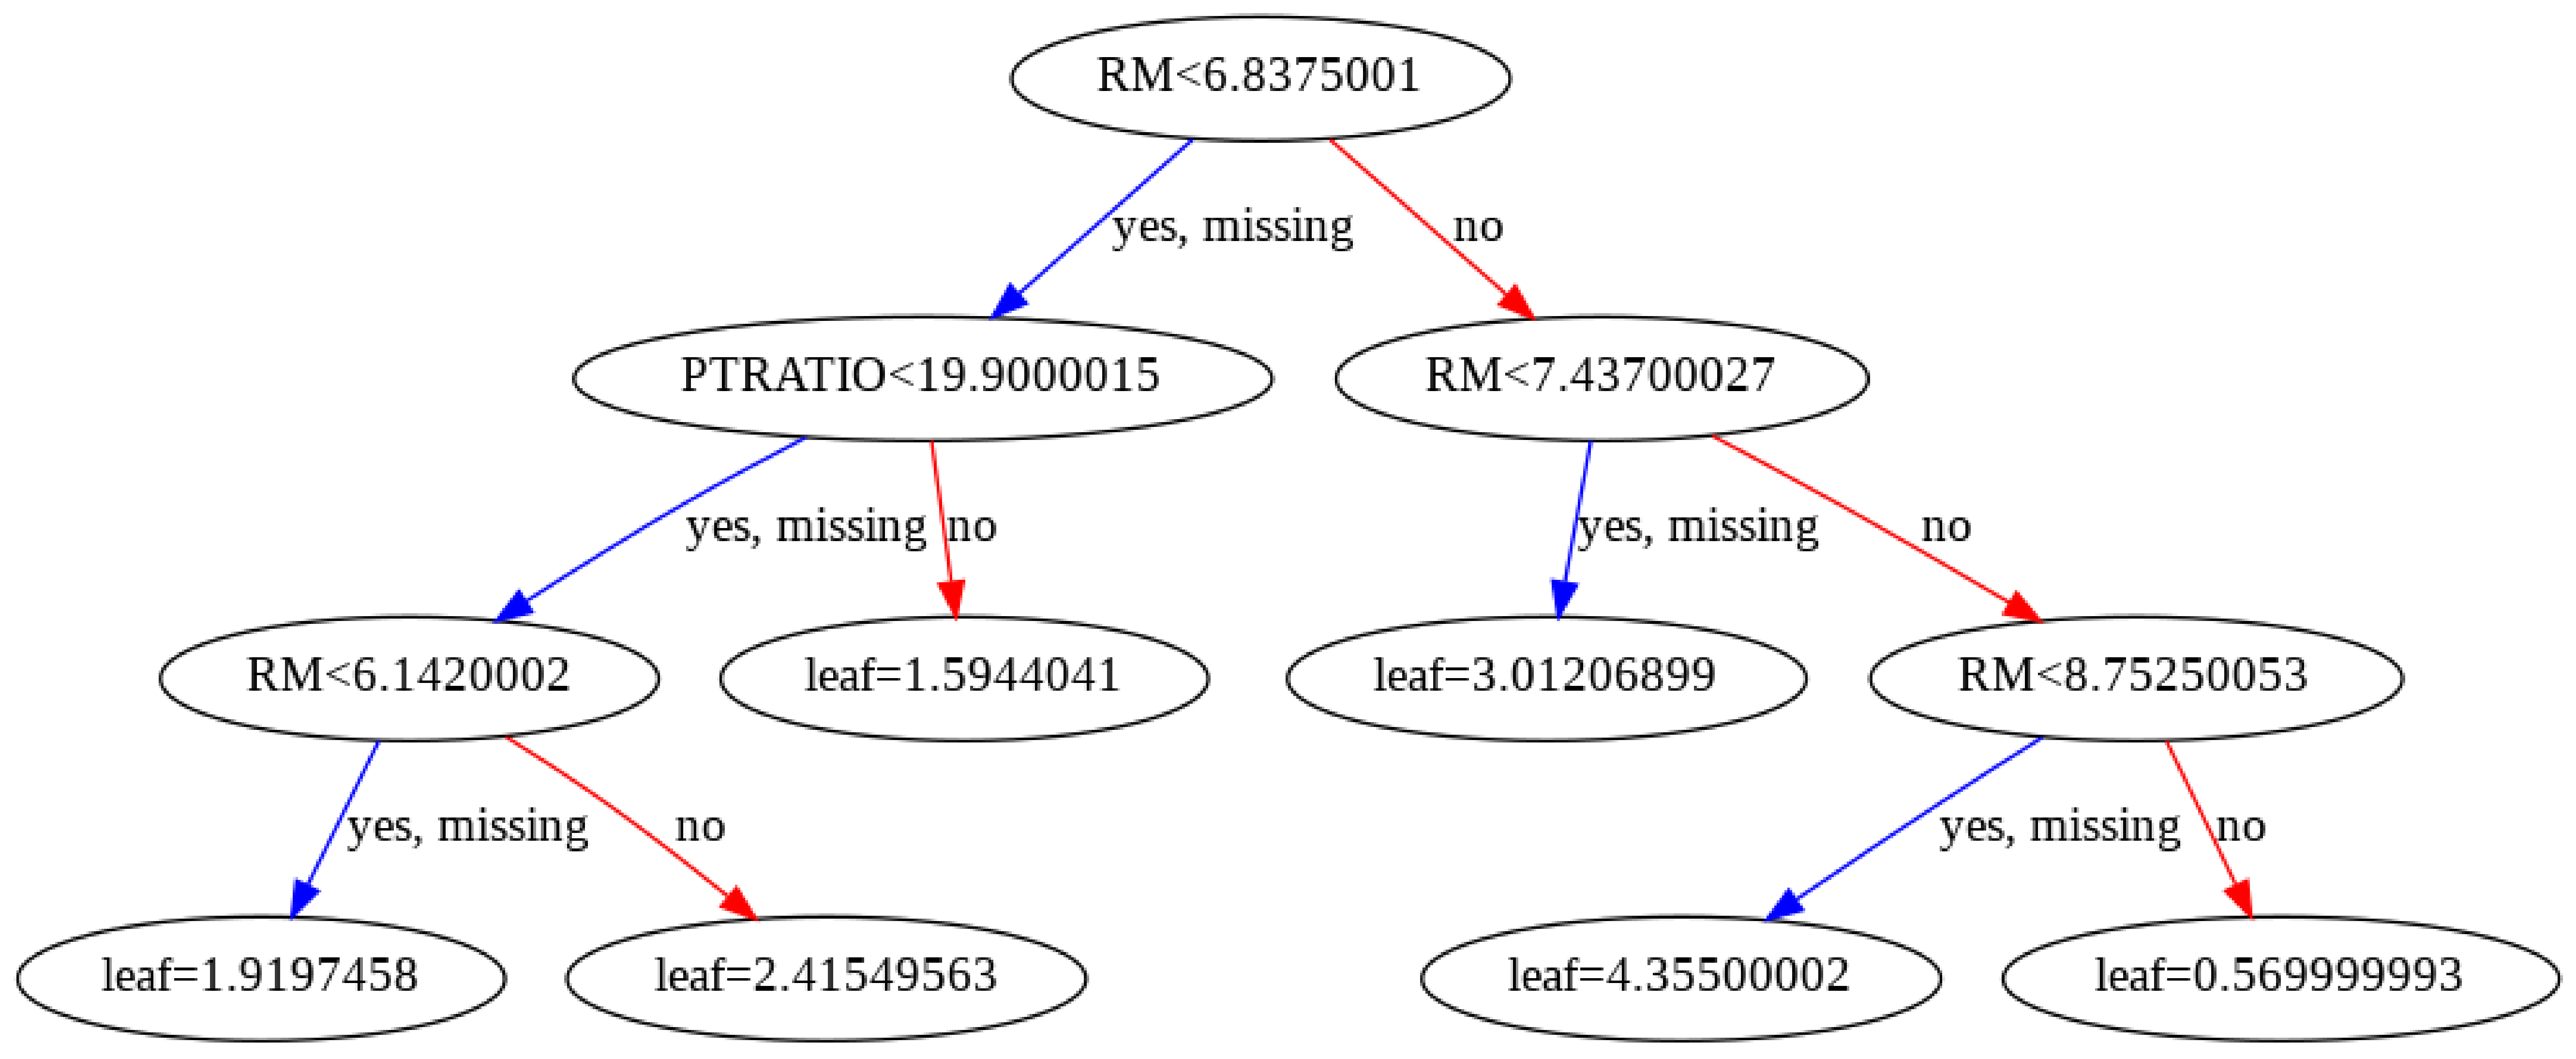

In [23]:
xg_reg = xgb.train(params = _params_, dtrain = pd_Boston_dmatrix, num_boost_round = 10)
xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize']=[100,40]
plt.show()

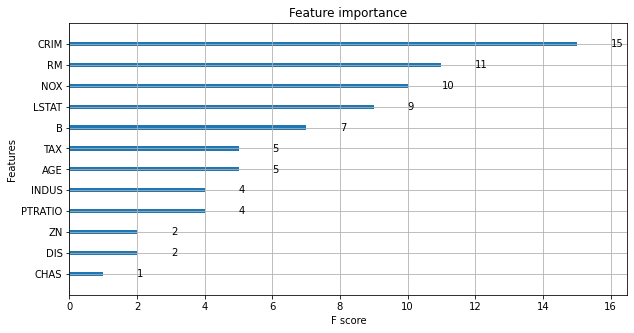

In [28]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()